Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.formula.api as smf


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups (1).csv to 50_Startups (1).csv


In [ ]:
startup=pd.read_csv("50_Startups (1).csv")

In [ ]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startup.corr()
#R&D Spend and Marketing Spend are more important than Administration
#R&D Spend and Marketing Spend are 72% dependent on each other. i.e colinear

<ipython-input-6-961a55118216>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
startup.rename(columns={'R&D Spend':'RD', 'Marketing Spend': 'Marketing'}, inplace=True)

In [ ]:
startup.duplicated().sum()

0

In [ ]:
startup.head(2)

,RD,Administration,Marketing,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


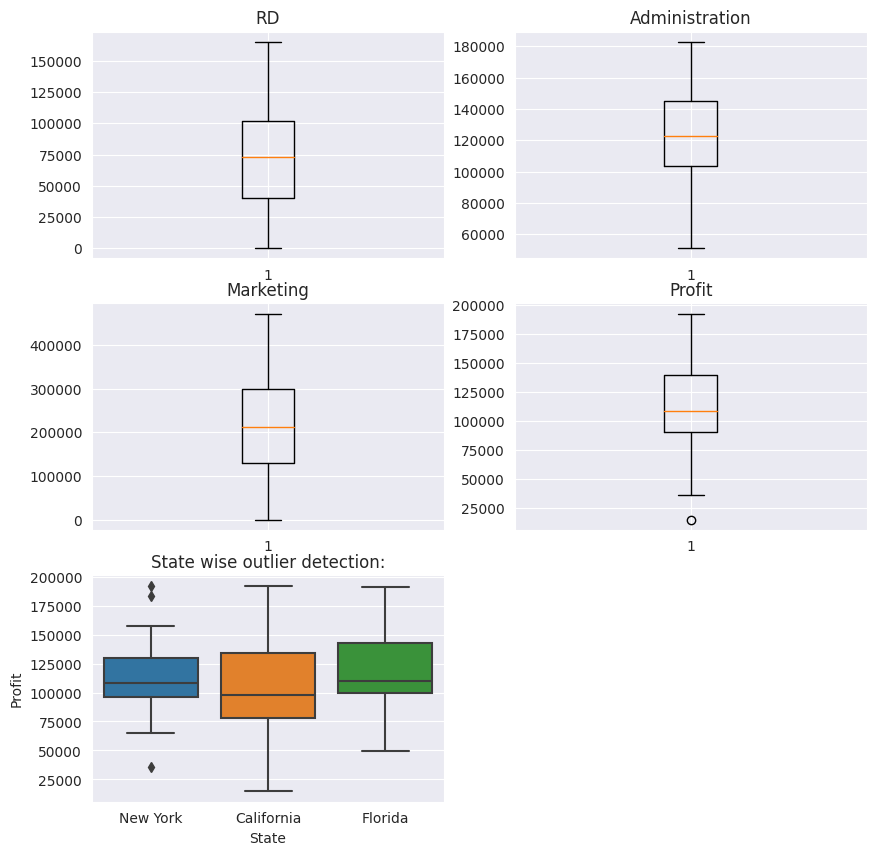

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
box=plt.boxplot(startup.RD)
plt.title("RD")


plt.subplot(3,2,2)
box=plt.boxplot(startup.Administration)
plt.title("Administration")


plt.subplot(3,2,3)
box=plt.boxplot(startup.Marketing)
plt.title("Marketing")


plt.subplot(3,2,4)
box=plt.boxplot(startup.Profit)
plt.title("Profit")

#State wise outlier detection:
plt.subplot(3,2,5)
sns.boxplot(x='State', y='Profit', data=startup)
plt.title("State wise outlier detection:")
plt.show()


#from the boxplot we can see that there is an outlier in profit
#Outliers are present in New york state


CHECKNG FOR CO-LINEARITY

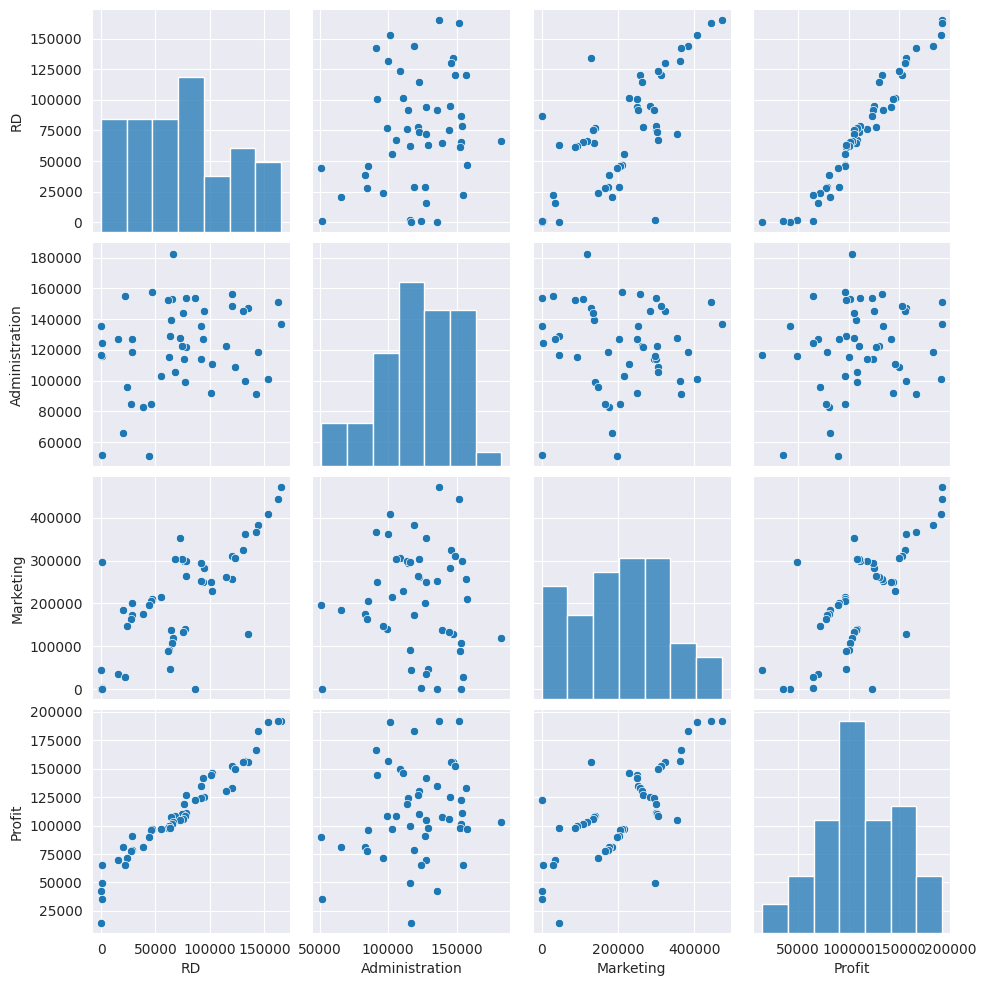

In [ ]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(startup)

#VIF


In [ ]:
rsq_RD=smf.ols('RD~Administration+Marketing', data=startup).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_Admin=smf.ols('Administration~RD+Marketing', data=startup).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_Marketing=smf.ols('Marketing~RD+Administration', data=startup).fit().rsquared
vif_Marketing=1/(1-rsq_Marketing)

#store vif in dataframe
d1={'Variables':['RD','Administration','Marketing'], 'VIF':[vif_RD,vif_Admin,vif_Marketing]}
dataframe=pd.DataFrame(d1)
dataframe


#we will consider VIF threshold as 10, all the VIF values are less than 10, hence there is no colinearity


,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


BUILD MODEL

In [ ]:

import statsmodels.formula.api as smf
model=smf.ols('Profit ~ RD+Administration+Marketing', data=startup).fit()

In [ ]:
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [ ]:
print('T values------------ ''\n',model.tvalues, '\n', 'P values--------------','\n', model.pvalues)
#If we see the P values
#H0---->y not dependent on X
#HA----> y is dependent on x
#alpha=0.05
#P<alpha ---->Accept Alternate Hypothesis
#For a good model, HA should be true.

T values------------ 
 Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 P values-------------- 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

#Accuracy of our model is good.

(0.9507459940683246, 0.9475337762901719)

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.948     
Dependent Variable:    Profit            AIC:                 1058.7715 
Date:                  2023-06-17 06:39  BIC:                 1066.4196 
No. Observations:      50                Log-Likelihood:      -525.39   
Df Model:              3                 F-statistic:         296.0     
Df Residuals:          46                Prob (F-statistic):  4.53e-30  
R-squared:             0.951             Scale:               8.5236e+07
------------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------------
Intercept      50122.1930 6572.3526  7.6262 0.0000 36892.7333 63351.6526
RD                 0.8057    0.0451 17.8464 0.0000     0.7148     0.8966
Administration    -0.0268    0.0510 -0.5255 0.6018    -0.1295     0.0759
Marketing          0.0272    0.0165  1.6551 0.1047    -0.0059     0.0603
------------------------------------------------------------------------
Omnibus:                14.838         Durbin-Watson:            1.282  
Prob(Omnibus):          0.001          Jarque-Bera (JB):         21.442 
Skew:                   -0.949         Prob(JB):                 0.000  
Kurtosis:               5.586          Condition No.:            1402132
========================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [ ]:
new_data=pd.DataFrame({'RD':165444,"Administration":90000,"Marketing":300000},index=[1])

In [ ]:
model.predict(new_data)

1    189177.895993
dtype: float64

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
from pandas import read_csv


In [2]:
series = read_csv('ToyotaCorolla.csv', encoding='latin-1')
series.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [3]:
series.drop(['Id','Model', 'Mfg_Month','Mfg_Year', 'Fuel_Type','Color', 'Met_Color', 'Automatic', 'Cylinders'], axis=1, inplace=True)

In [4]:
series.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,46986,90,2000,3,5,210,1165,0,...,1,1,1,0,0,0,1,0,0,0


In [5]:
data=series.iloc[:,:9]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
data1=data.drop_duplicates().reset_index(drop=True)

In [10]:
data1.duplicated().sum()

0

In [11]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Text(0.5, 1.0, 'Weight')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


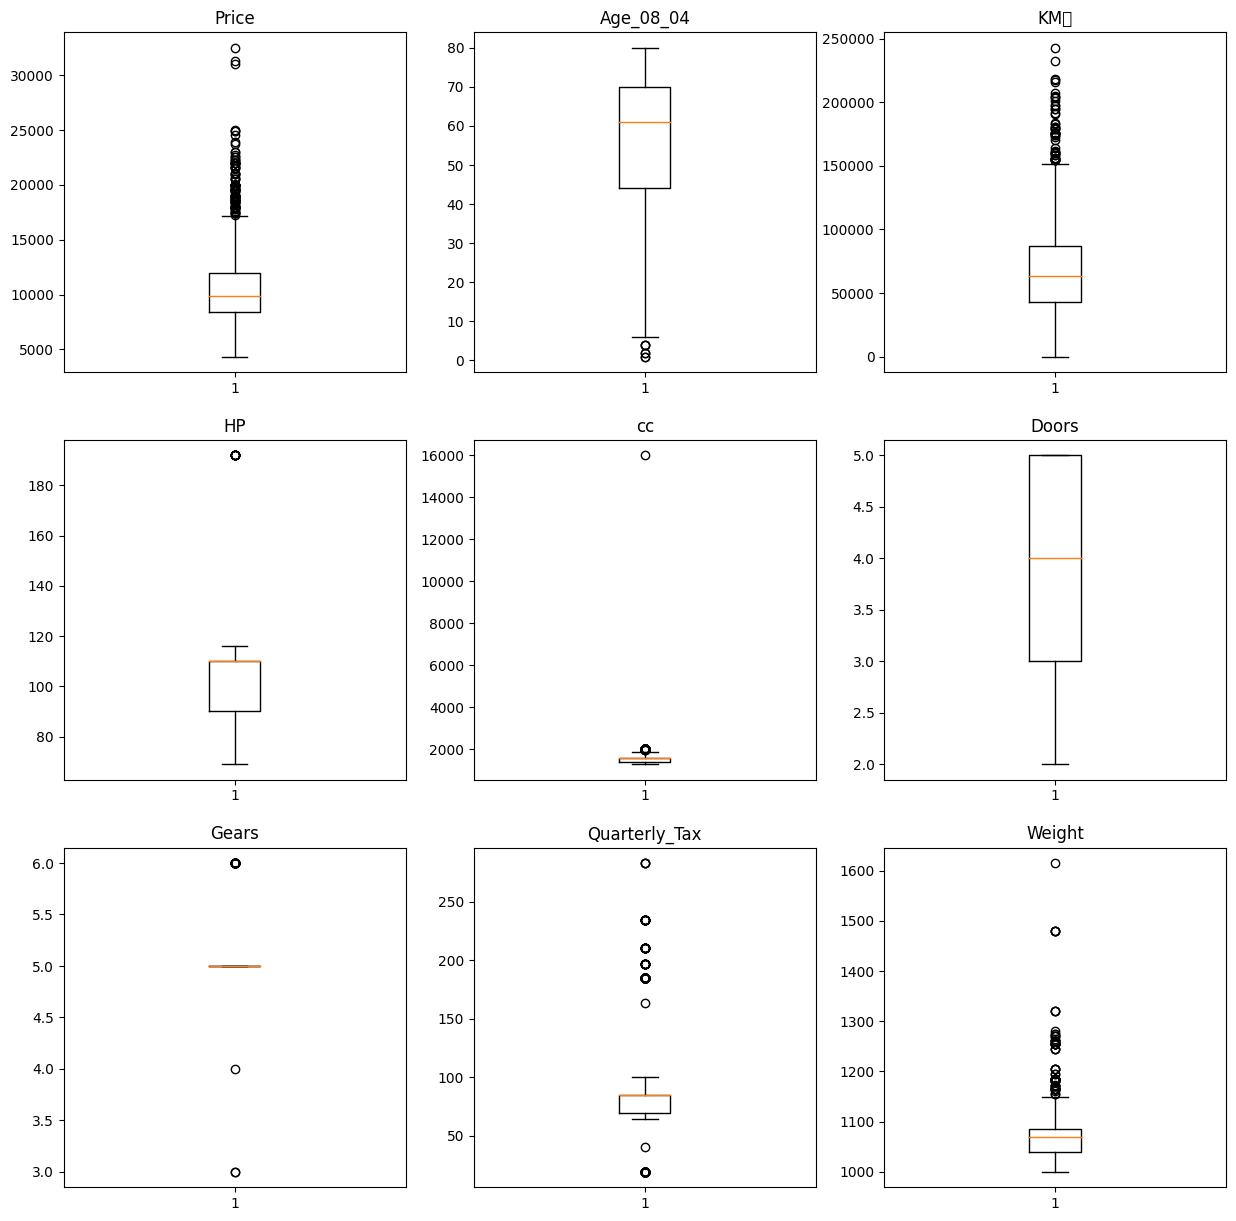

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
box=plt.boxplot(data.Price)
plt.title("Price")


plt.subplot(3,3,2)
box1=plt.boxplot(data.Age_08_04)
plt.title("Age_08_04")

plt.subplot(3,3,3)
box2=plt.boxplot(data.KM	)
plt.title("KM	")

plt.subplot(3,3,4)
box3=plt.boxplot(data.HP	)
plt.title("HP")

plt.subplot(3,3,5)
box4=plt.boxplot(data.cc	)
plt.title("cc")

plt.subplot(3,3,6)
box5=plt.boxplot(data.Doors	)
plt.title("Doors")

plt.subplot(3,3,7)
box6=plt.boxplot(data.Gears	)
plt.title("Gears")


plt.subplot(3,3,8)
box7=plt.boxplot(data.Quarterly_Tax	)
plt.title("Quarterly_Tax")


plt.subplot(3,3,9)
box8=plt.boxplot(data.Weight	)
plt.title("Weight")

<Axes: >

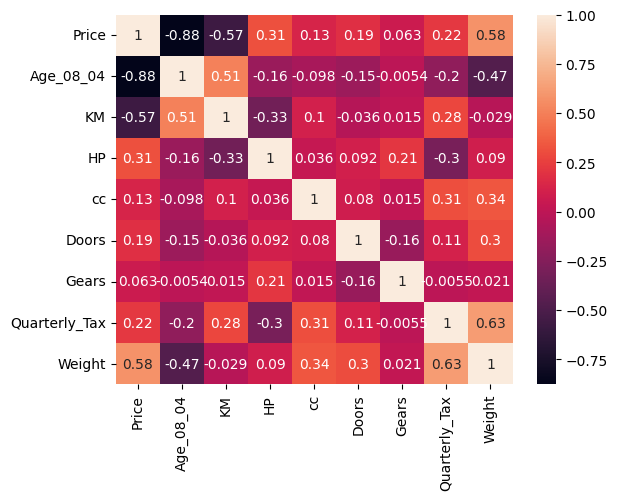

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=data.corr(), annot=True)

<Figure size 2000x2000 with 0 Axes>

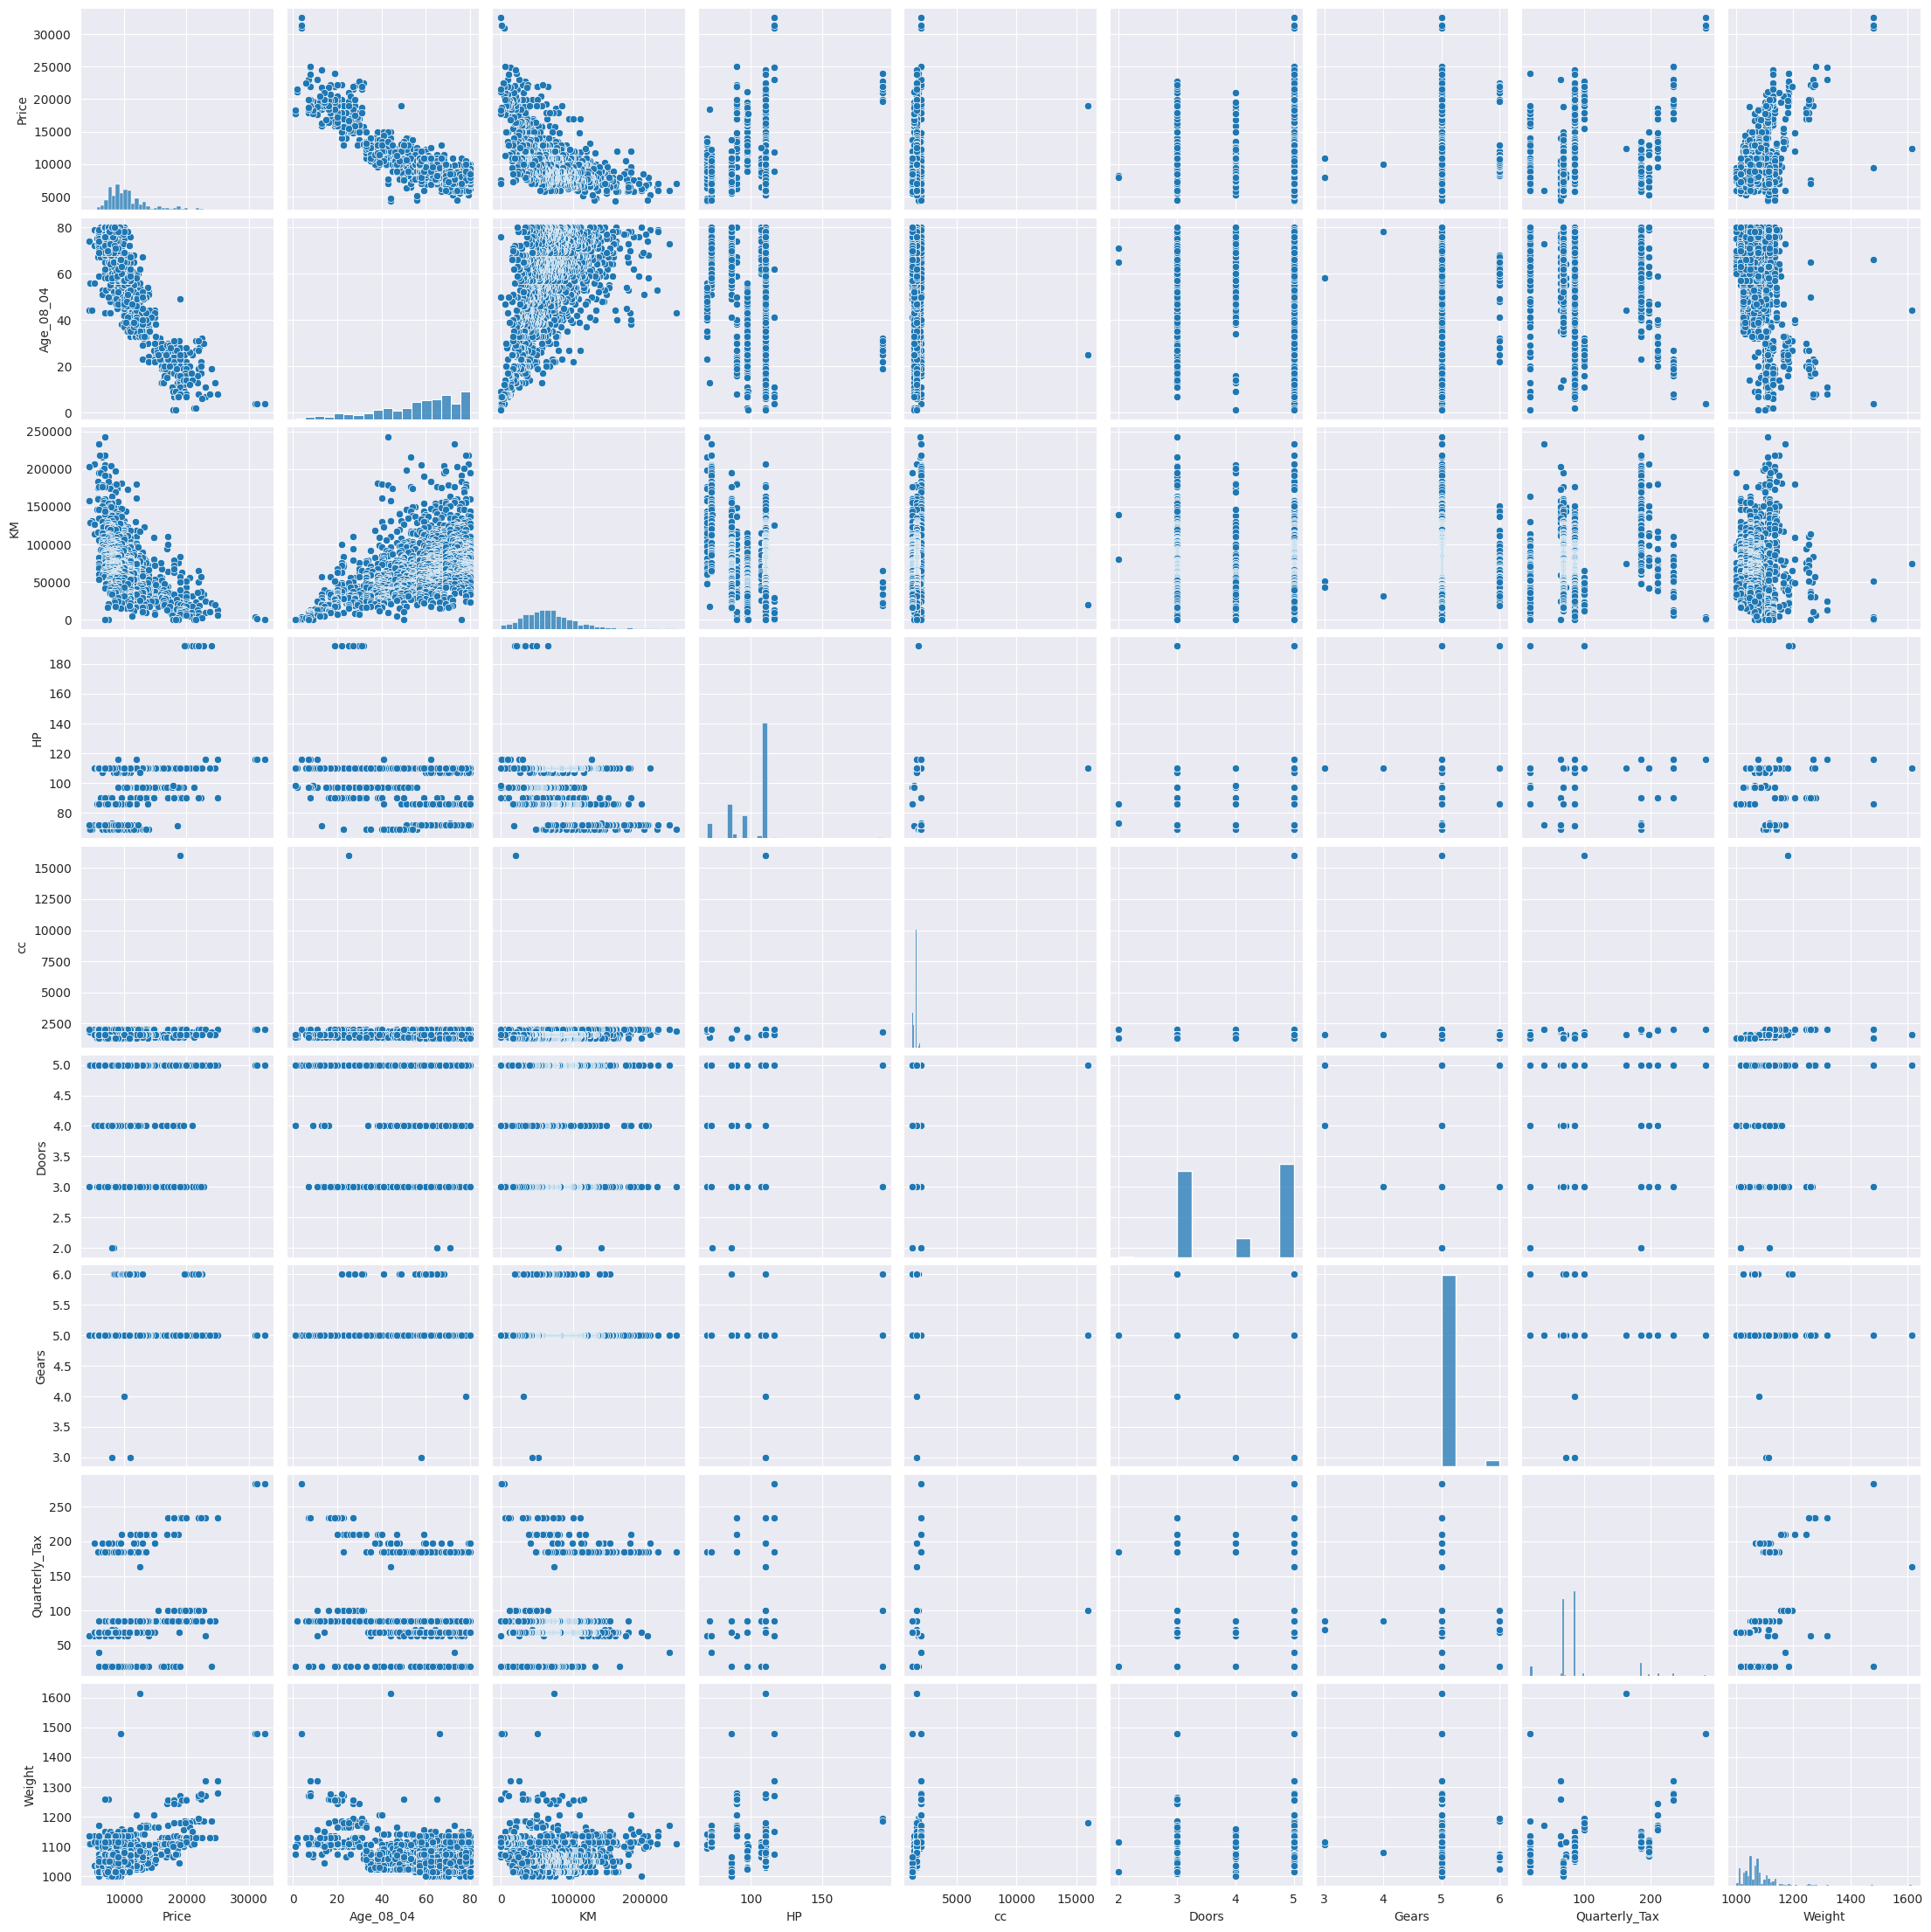

<Figure size 2000x2000 with 0 Axes>

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.figure(figsize=(20,20))

#preparing a model


In [15]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears	+Quarterly_Tax+Weight', data=data).fit()

In [16]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [16]:
print('T values-----------------','\n' ,model.tvalues, '\n' , 'P values-----------------------','\n',model.pvalues)

#check p values all are <0.05, i.e y is dependent on all of them

T values----------------- 
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 P values----------------------- 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [17]:
(model.rsquared, model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)